# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
#1 
import pandas as pd
import numpy as np
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
print(airbnb["Price"].head())
airbnb["Price_clean"] = (
    airbnb["Price"]
    .astype(str)                        
    .str.replace("$", "")  
    .str.replace(",", "")  
)

airbnb["Price_clean"] = pd.to_numeric(
    airbnb["Price_clean"],
    errors="coerce"
)

'''Before cleaning, the Price column contained string values and objects that stored an object rather than a number. After cleaning and removing non-numeric characters, the value could then be used for numeric analysis. I removed dollar signs and commas to create a more consistent format for the price data.'''

0    145
1     37
2     28
3    199
4    549
Name: Price, dtype: object


'Before cleaning, the Price column contained string values and objects that stored an object rather than a number. After cleaning and removing non-numeric characters, the value could then be used for numberic analysis. I removed dollar signs and commas to create a more consistent format for the price data.'

In [ ]:
#2 
mn = pd.read_csv("data/mn_police_use_of_force.csv", encoding="latin1")
mn["subject_injury"].value_counts(dropna=False)
mn["subject_injury_clean"] = mn["subject_injury"].str.strip().str.lower()
mn["subject_injury_clean"] = mn["subject_injury_clean"].map({
    "yes": "Yes",
    "no": "No"
})
prop_missing = mn["subject_injury_clean"].isna().mean()
print("The proportion of missing values in subject_injury_clean is:", prop_missing)
crosstable = pd.crosstab(mn["subject_injury_clean"], mn["force_type"], dropna=False)
mn["subject_injury_clean"] = mn["subject_injury_clean"].fillna("Missing")
print(crosstable)

''''The cross tabulation shows that certain missing values appear more frequently with certain force types. This shows that missing values are not random and may be related to how certain force types are reported.'''

The proportion of missing values in subject_injury_clean is: 0.7619342359767892
force_type            Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury_clean                                                    
No                        0          1093                131        2   
Yes                       2          1286                 41        0   
NaN                       2          7051               1421        0   

force_type            Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury_clean                                                      
No                                   33                 34            0   
Yes                                  44                 40            0   
NaN                                  27                 74           87   

force_type            Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury_clean                                                        
No                      

In [ ]:
#3
meta["Overall Survival Status"].value_counts(dropna=False)
meta["survival_dummy"] = meta["Overall Survival Status"].map({
    "1:DECEASED": 0,
    "0:LIVING": 1
})
meta["survival_dummy"].value_counts()


survival_dummy
0    768
1    575
Name: count, dtype: int64

In [ ]:
#4 
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin1")
airbnb["Review Scores Rating"].isna().sum()
median_rating = airbnb["Review Scores Rating"].median()
airbnb["Review Scores Rating_imputed"] = (
    airbnb["Review Scores Rating"]
    .fillna(median_rating)
)
print("Number of missing values in Review Scores Rating_imputed:", airbnb["Review Scores Rating_imputed"].isna().sum())
'''From my observation, there are no missing values in the data and therefore the median imputation does not alter any observations.'''

Number of missing values in Review Scores Rating_imputed: 0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

The proportion of unprovoked attacks is: 0.7387616624257846


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22,Age_clean,Type_clean,Fatal_clean
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0,Unprovoked,Yes
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked,No
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unprovoked,No
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,Unprovoked,No
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,Unprovoked,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7069,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,Roebuck Bay,Diving,male,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0005,ND.0005,6.0,NaN,NaN,NaN,Unprovoked,Yes
7070,Before 1903,0.0,Unprovoked,AUSTRALIA,Western Australia,NaN,Pearl diving,Ahmun,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0004,ND.0004,5.0,NaN,NaN,NaN,Unprovoked,Yes
7071,1900-1905,0.0,Unprovoked,USA,North Carolina,Ocracoke Inlet,Swimming,Coast Guard personnel,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0003,ND.0003,4.0,NaN,NaN,NaN,Unprovoked,Yes
7072,1883-1889,0.0,Unprovoked,PANAMA,NaN,"Panama Bay 8ºN, 79ºW",NaN,Jules Patterson,M,NaN,...,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,ND.0002,ND.0002,3.0,NaN,NaN,NaN,Unprovoked,Yes


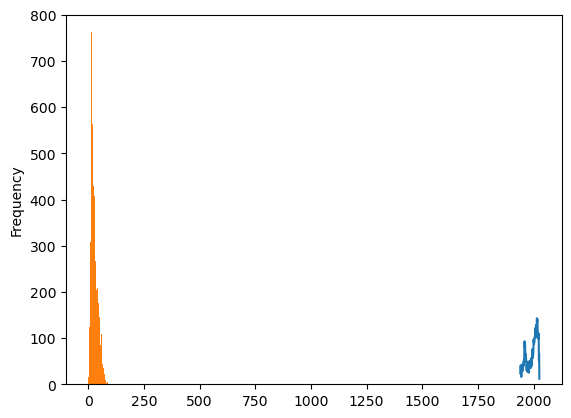

In [ ]:
#1 Since it is an Excel file, we can use pd.read_excel to read the data into a pandas DataFrame.
import pandas as pd
shark = pd.read_excel("~/Downloads/GSAF5.xls")

#2
shark = shark.dropna(axis=1, how="all")

#3 An observation is a single and complete data point that is usually represented by a row. In the shark attack incident data, each observation is equal to a single shark attack incident. Each of the rows contains details such as the data, activity, and outcome. When cleaning and analyzing, we should standardize the different formats across rows and not double-count by ensuring that each row is a unique observation (do not drop any rows containing missing values, as they may still contain important values in other columns) 

#4 
shark["Year"] = pd.to_numeric(shark["Year"], errors="coerce")
shark["Year"].min(), shark["Year"].max()
shark_post_1940 = shark[shark["Year"] >= 1940]
attacks_per_year = shark_post_1940["Year"].value_counts().sort_index()
attacks_per_year.head(), attacks_per_year.tail()
attacks_per_year.plot(kind="line")
'''The number of shark attacks has generally increased over time since 1940. However, there are many fluctuations in the data.'''

#5 
shark["Age_clean"] = pd.to_numeric(shark["Age"], errors="coerce")
shark["Age_clean"].plot(kind="hist", bins=20)

#6 
shark["Type_clean"] = shark["Type"].str.strip().str.lower()
shark["Type_clean"] = shark["Type_clean"].map({
    "provoked": "Provoked",
    "unprovoked": "Unprovoked"
}).fillna("Unknown")
print("The proportion of unprovoked attacks is:", (shark["Type_clean"] == "Unprovoked").mean())

#7 
shark["Fatal_clean"] = shark["Fatal Y/N"].str.strip().str.upper()
shark["Fatal_clean"] = shark["Fatal_clean"].map({
    "Y": "Yes",
    "N": "No"
}).fillna("Unknown")
shark

#8 Provoked attacks are less likely to be fatal than unprovoked attacks. I think this might be because unprovoked attacks are not expected by the human and therefore can lead to more fatal outcomes. 


**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

In [ ]:
#1 This paper talks about one component of the data cleaning process, namely data tidying. Tidy datasets are useful as they are easier to manipulate, model, and visualize. Additionally, their flexible structure makes them easier to utilize since they only require a small range of tools to deal with a wide range of tidy data.
#2 The introduction states how tidy data is intended to provide a consistent way to structure datasets so that they are easier to manipulate, model, and visualize. This efficiency standardizes how variables are organized and ensures that analysts are able to focus on the content of their data rather than the logistical issues that come with messy data.
#3 The first sentence states that while tidy data follow a standard set of rules and structures, messy datasets can be disorganized in an infinite number of ways and each has its own problem that must be solved individually.
#4 Values are defined as individual pieces of data stored in cells. A variable is a collection of values that measure the same attribute. An observation is a collection of values that measure the same unit across different variables. 
#5 Tidy data is defined as a way of organizing data where each variable is a column, each row is an observation, and each unit has its own table. 
#6 The five most common problems are that column headers are values rather than variable names, multiple variables are stored in a single column, variables are stored in rows and columns, multiple types of observational units are stored in the same table, and a single observational unit is stored in multiple tables. Table 4 is messy because it is not tidy data, and column headers do not represent a single variable name. Therefore, variables and values are mixed across rows and columns. Melting a dataset means converting the columns that represent values into rows.
#7 Table 11 is messy because the column headers represent values rather than actual variables. This means a single variable is spread across many columns and mixes variables and values. Table 12 is molten because each row contains a single value, but variable names are still stored as elements in a column. 

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? 

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
6. Which giftors provide the most money, in total? 

Axes(0.125,0.11;0.775x0.77)
Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64
Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               3195

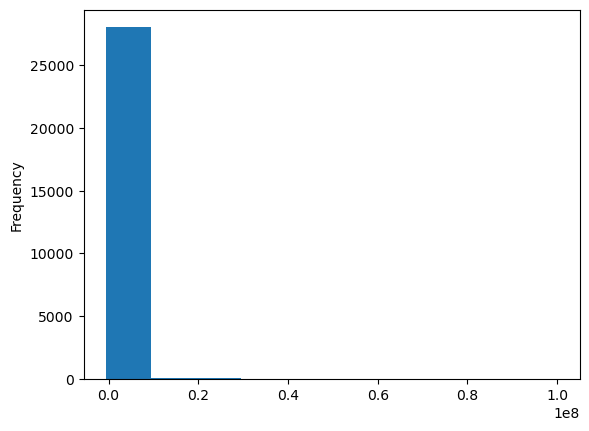

In [127]:
#1 
gift = pd.read_csv("data/ForeignGifts_edu.csv", encoding="latin1")
#2 
gift_amount_hist = gift["Foreign Gift Amount"].plot(kind="hist") 
print(gift_amount_hist)
#3 
gift["Gift Type"].value_counts()
print(gift["Gift Type"].value_counts(normalize=True))
#4 
gift.columns
gift["Country of Giftor"].value_counts().head(15)
gift["Foreign Gift Amount"] = pd.to_numeric(
    gift["Foreign Gift Amount"], errors="coerce"
)
gift.groupby("Country of Giftor")["Foreign Gift Amount"].sum().sort_values(ascending=False).head(15)
#5 
print(gift.groupby("Institution Name")["Foreign Gift Amount"] \
    .sum() \
    .sort_values(ascending=False) \
    .head(15))
#6 The giftors making the most money are Carnegie Mellon University, Cornell University, and Harvard University. 

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

(3798, 63)


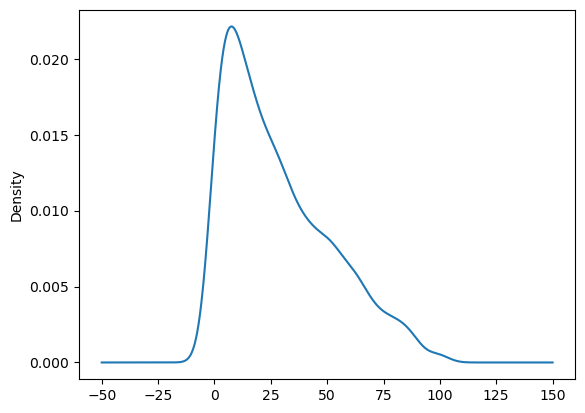

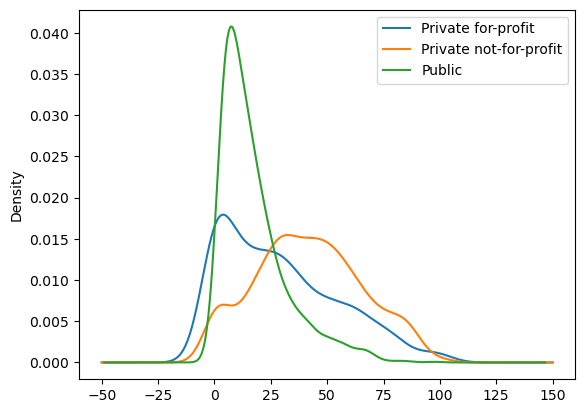

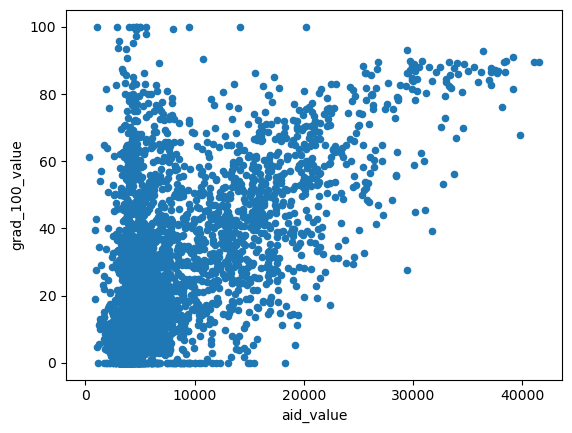

Covariance: 88610.48316902434
Correlation: 0.5758792845936075


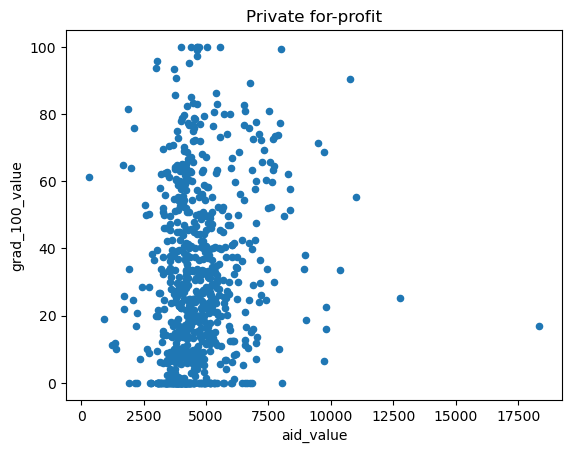

Covariance: 6897.5249572378125
Correlation: 0.18836270084245593



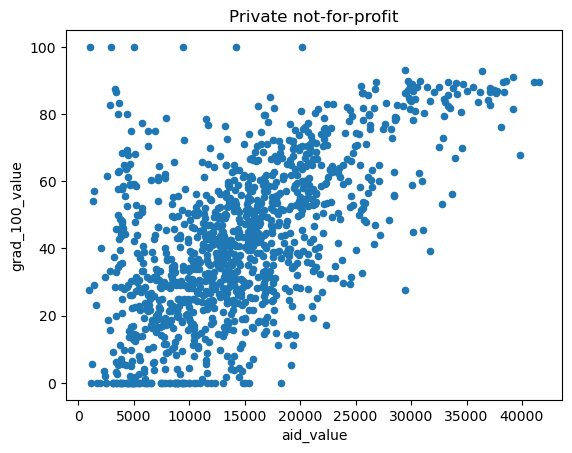

Covariance: 109274.12333702885
Correlation: 0.6015909241488575



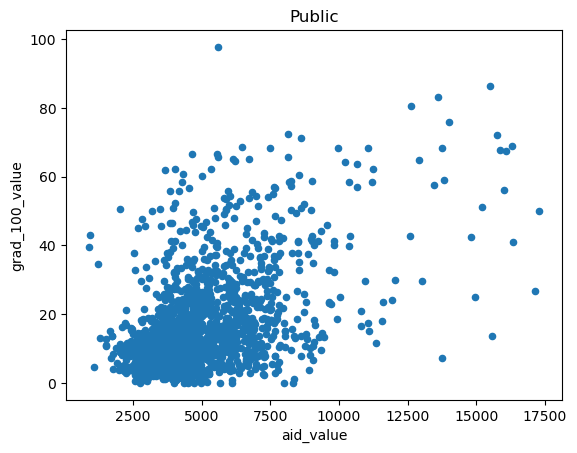

Covariance: 15355.146211760217
Correlation: 0.4824810458983383



'The scatterplots show a weak and positive correlation between aid and graduation rate. When conditioning on control, the relationship is more clearly positive for private institutions. Also, it is weaker for public institutions.'

In [134]:
#1 
college_completion= pd.read_csv("data/college_completion.csv", encoding="latin1")

#2
print(college_completion.shape)
college_completion.head()
'''There are 3798 observations and 63 variacles.'''

#3
pd.crosstab(college_completion["control"], college_completion["level"])
'''This shows that more public institutions offer 4-year and 2-year programs, while private institutions are mainly 4-year.'''

#4
college_completion["grad_100_value"].plot(kind="kde")
plt.show()
college_completion["grad_100_value"].describe()

for ctrl, df in college_completion.groupby("control"):
    df["grad_100_value"].plot(kind="kde", label=ctrl)
plt.legend()
plt.show()
college_completion.groupby("control")["grad_100_value"].describe()
'''Private institutions have a higher graduation rate than public institutions, and the distribution of graduation rates for private institutions is more right-skewed than that of public institutions.'''

#5
college_completion.plot(kind="scatter", x="aid_value", y="grad_100_value")
plt.show()
print("Covariance:", college_completion["aid_value"].cov(college_completion["grad_100_value"]))
print("Correlation:", college_completion["aid_value"].corr(college_completion["grad_100_value"]))

for ctrl, df in college_completion.groupby("control"):
    df.plot(kind="scatter", x="aid_value", y="grad_100_value", title=ctrl)
    plt.show()
    print("Covariance:", df["aid_value"].cov(df["grad_100_value"]))
    print("Correlation:", df["aid_value"].corr(df["grad_100_value"]))
    print()
'''The scatterplots show a weak and positive correlation between aid and graduation rate. When conditioning on control, the relationship is more clearly positive for private institutions. Also, it is weaker for public institutions.'''

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$. 

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

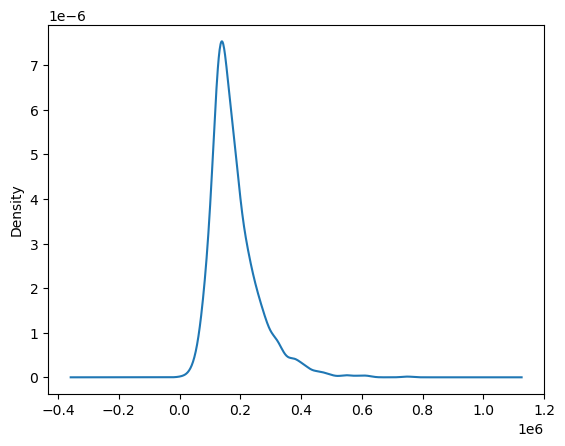

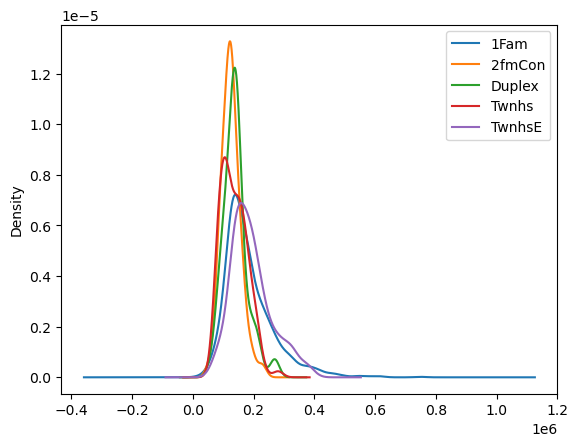

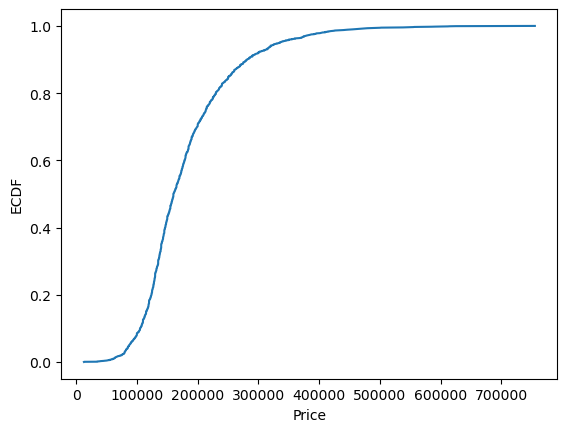

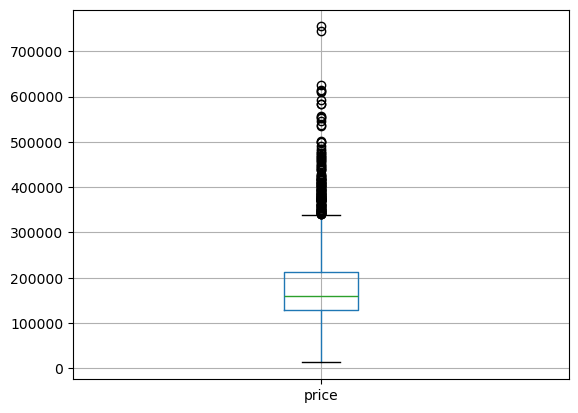

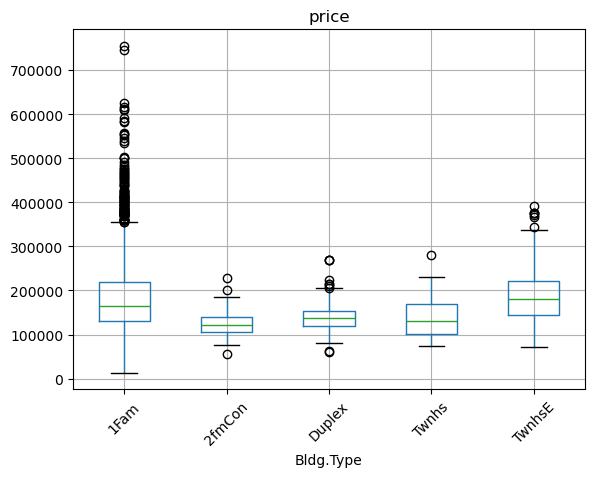

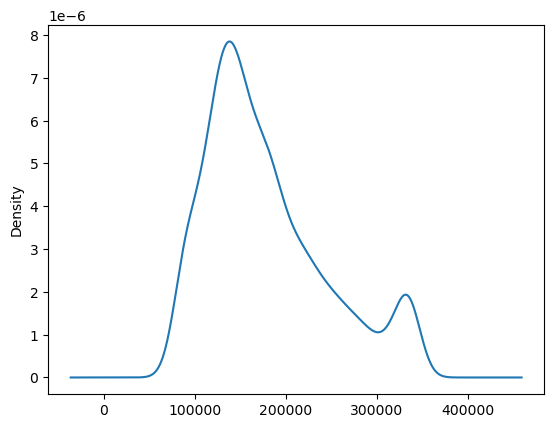

count      2930.000000
mean     177632.528669
std       66195.453960
min       87500.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      335000.000000
Name: price_winsor, dtype: float64

In [ ]:
#1
ames = pd.read_csv("data/ames_prices.csv")

#2
ames["price"].plot(kind="kde")
plt.show()
ames["price"].describe()

#3
ames.groupby("Bldg.Type")["price"].plot(kind="kde", legend=True)
plt.show()
ames.groupby("Bldg.Type")["price"].describe()
'''Single family homes are more expensive than other homes but they also have higher variability. Townhomes and two-family conversions tend to have lower average prices.'''
x = np.sort(ames["price"])
y = np.arange(1, len(x) + 1) / len(x)

plt.plot(x, y)
plt.xlabel("Price")
plt.ylabel("ECDF")
plt.show()
ames["price"].quantile([0, 0.25, 0.5, 0.75, 1])

#4
ames.boxplot(column="price")
plt.show()
ames.boxplot(column="price", by="Bldg.Type", rot=45)
plt.suptitle("")
plt.show()
'''Looking at the boxplots, we can see that there are several extremely high outliers than other building types that raising the prices of such homes.'''

#5
Q1 = ames["price"].quantile(0.25)
Q3 = ames["price"].quantile(0.75)
IQR = Q3 - Q1
ames["price_outlier"] = (
    (ames["price"] < Q1 - 1.5 * IQR) |
    (ames["price"] > Q3 + 1.5 * IQR)
).astype(int)

#6
lower = ames["price"].quantile(0.05)
upper = ames["price"].quantile(0.95)
ames["price_winsor"] = ames["price"].clip(lower, upper)
ames["price_winsor"].plot(kind="kde")
plt.show()
ames["price_winsor"].describe()
'''This process reduces the influence of outliers by lowering the variance and smoothing the distributions. The mean is also more representative of the data after winsorization.'''